In [8]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl
from matplotlib import colors

In [9]:
import numpy as np 
import pandas as pd 
import xarray as xr

In [10]:
from datetime import datetime

In [11]:
from cartopy import crs as ccrs
from cartopy import feature as cfeature 
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter

### import palettable for nice colormaps (see https://jiffyclub.github.io/palettable/) 

In [12]:
import palettable

### read the CMORPH dataset, downloaded from the KNMI climate explorer  (https://climexp.knmi.nl/)

In [13]:
dset = xr.open_dataset('../data/CMORPH/cmorph_monthly_from_KNMI.nc', decode_times=False)

In [14]:
dset

<xarray.Dataset>
Dimensions:  (lat: 240, lon: 720, time: 269)
Coordinates:
  * time     (time) float64 0.0 1.0 2.0 3.0 4.0 ... 265.0 266.0 267.0 268.0
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * lat      (lat) float32 -59.75 -59.25 -58.75 -58.25 ... 58.75 59.25 59.75
Data variables:
    prcp     (time, lat, lon) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.9.8 (https:/...
    history:                    Thu Jun 04 10:54:23 2020: cdo -L settaxis,199...
    institution:                NCEP/CPC
    Conventions:                CF-1.0
    title:                      CMORPH Version 1.0, RAW daily precip from 00Z...
    source_url:                 http://www.cpc.ncep.noaa.gov/products/janowia...
    reference:                  Joyce, R. J., J. E. Janowiak, P. A. Arkin, an...
    geospatial_lat_min:         -60.0
    geospatial_lat_max:         60.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.5
    geospatial_lon_resolution:  0.5
    time_coverage_start:        1998-01-01
    time_coverage_end:          2020-05-31
    climexp_url:                https://climexp.knmi.nl/select.cgi?cmorph_daily
    frequency:                  mon
    CDO:                        Climate Data Operators version 1.9.8 (https:/...

### we have to create a proper time index using pandas 

In [15]:
dset['time'] = pd.date_range(start='1998-1-1', periods=len(dset.time), freq='MS')

In [16]:
dset

<xarray.Dataset>
Dimensions:  (lat: 240, lon: 720, time: 269)
Coordinates:
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2020-05-01
  * lon      (lon) float32 0.25 0.75 1.25 1.75 ... 358.25 358.75 359.25 359.75
  * lat      (lat) float32 -59.75 -59.25 -58.75 -58.25 ... 58.75 59.25 59.75
Data variables:
    prcp     (time, lat, lon) float32 ...
Attributes:
    CDI:                        Climate Data Interface version 1.9.8 (https:/...
    history:                    Thu Jun 04 10:54:23 2020: cdo -L settaxis,199...
    institution:                NCEP/CPC
    Conventions:                CF-1.0
    title:                      CMORPH Version 1.0, RAW daily precip from 00Z...
    source_url:                 http://www.cpc.ncep.noaa.gov/products/janowia...
    reference:                  Joyce, R. J., J. E. Janowiak, P. A. Arkin, an...
    geospatial_lat_min:         -60.0
    geospatial_lat_max:         60.0
    geospatial_lat_units:       degrees_north
    geospatial_lon_min:         0.0
    geospatial_lon_max:         360.0
    geospatial_lon_units:       degrees_east
    geospatial_lat_resolution:  0.5
    geospatial_lon_resolution:  0.5
    time_coverage_start:        1998-01-01
    time_coverage_end:          2020-05-31
    climexp_url:                https://climexp.knmi.nl/select.cgi?cmorph_daily
    frequency:                  mon
    CDO:                        Climate Data Operators version 1.9.8 (https:/...

### restrict the domain to [110.,-40.,280.,40.] 

In [17]:
dset = dset.sel(lat=slice(-40., 40.), lon=slice(110, 280))

### calculate the climatology over the period 1998 - 2018

In [18]:
clim = dset.sel(time=slice('1998','2018'))

In [19]:
clim = clim.groupby(clim.time.dt.month).mean('time')

In [20]:
clim

<xarray.Dataset>
Dimensions:  (lat: 160, lon: 340, month: 12)
Coordinates:
  * lat      (lat) float32 -39.75 -39.25 -38.75 -38.25 ... 38.75 39.25 39.75
  * lon      (lon) float32 110.25 110.75 111.25 111.75 ... 278.75 279.25 279.75
  * month    (month) int64 1 2 3 4 5 6 7 8 9 10 11 12
Data variables:
    prcp     (month, lat, lon) float32 0.6418142 0.6038453 ... 1.0552281

### now calculate the anomalies WRT to climatology 

In [21]:
anoms = dset.groupby(dset.time.dt.month) - clim

In [22]:
anoms

<xarray.Dataset>
Dimensions:  (lat: 160, lon: 340, time: 269)
Coordinates:
  * lat      (lat) float32 -39.75 -39.25 -38.75 -38.25 ... 38.75 39.25 39.75
  * lon      (lon) float32 110.25 110.75 111.25 111.75 ... 278.75 279.25 279.75
  * time     (time) datetime64[ns] 1998-01-01 1998-02-01 ... 2020-05-01
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 7 8 9 10 11 12 1 2 3 4 5
Data variables:
    prcp     (time, lat, lon) float32 1.1275463 1.1150784 ... -1.268076

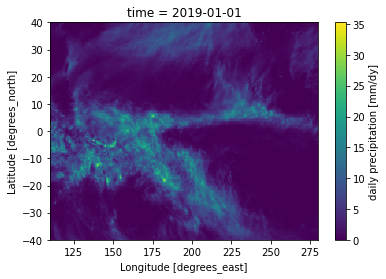

In [23]:
dset.sel(time='2019-01')['prcp'].plot()

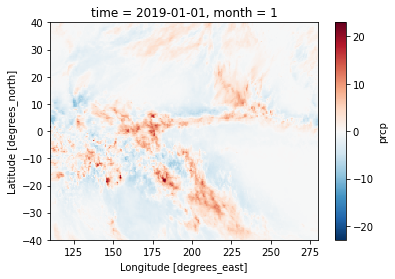

In [24]:
anoms.sel(time='2019-01')['prcp'].plot()

### quick plots the anomalies for January 2019

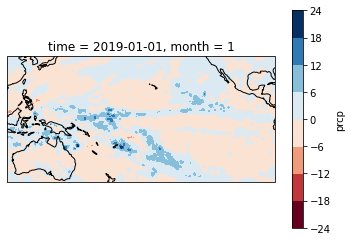

In [25]:
f, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)})
a = anoms.sel(time='2019-01')['prcp'][0,:,:].plot.contourf(transform=ccrs.PlateCarree(), levels=10, cmap=plt.cm.RdBu)
ax.coastlines()
cb = f.axes[1]

### Now proper map plot 

### define here the plotting functions

In [26]:
def plot_map(dataset, date, varname='prcp', fname=None, units="Rainfall anomalies (mm.day$^{-1}$)", title=None, vmin=-12, vmax=12, step=2, cmap=plt.cm.RdBu_r, norm=None):
    
    f, ax = plt.subplots(subplot_kw={'projection':ccrs.PlateCarree(central_longitude=180)}, figsize=(12,10))

    if norm is not None: 
    
        im = ax.contourf(dataset.lon, dataset.lat, dataset.sel(time=date)[varname], \
                         transform = ccrs.PlateCarree(central_longitude=0), \
                         levels = np.arange(vmin, vmax + step, step), \
                         extend = 'both', \
                         cmap = cmap, norm=norm)
    else:
        
        im = ax.contourf(dataset.lon, dataset.lat, dataset.sel(time=date)[varname], \
                         transform = ccrs.PlateCarree(central_longitude=0), \
                         levels = np.arange(vmin, vmax + step, step), \
                         extend = 'both', \
                         cmap = cmap, norm=norm)

    cb = plt.colorbar(im, shrink=0.8, pad=0.09, orientation='horizontal', aspect=30)

    cb.set_label(units, fontsize=14)

    [l.set_fontsize(13) for l in cb.ax.xaxis.get_ticklabels()]

    xticks = np.arange(0, 360, 40)

    yticks = [-30., 0, 30.]

    gl = ax.gridlines(draw_labels=False, linewidth=0., linestyle='--', xlocs=xticks, ylocs=yticks, crs=ccrs.PlateCarree())

    ax.set_xticks(xticks, crs=ccrs.PlateCarree())

    ax.set_yticks(yticks, crs=ccrs.PlateCarree())

    ax.coastlines(resolution='50m', zorder=10, lw=1)

    lon_formatter = LongitudeFormatter(zero_direction_label=True, dateline_direction_label=True) 

    lat_formatter = LatitudeFormatter()

    ax.xaxis.set_major_formatter(lon_formatter)

    ax.yaxis.set_major_formatter(lat_formatter)

    [l.set_fontsize(13) for l in ax.yaxis.get_ticklabels()]
    [l.set_fontsize(13) for l in ax.xaxis.get_ticklabels()]

    ax.set_extent([anoms.lon.data.min(), anoms.lon.data.max(), anoms.lat.data.min(), anoms.lat.data.max()], crs=ccrs.PlateCarree())

    if title is not None: 
        ax.set_title(title, fontsize=14) 

    if fname is not None: 
        f.savefig(fname, dpi=300, bbox_inches='tight')  

In [27]:
data_to_plot = anoms

### choose the date for the plot here 

In [28]:
varname = 'prcp'

In [29]:
vmin = -12
vmax = 12 
step = 2
center = 0

In [31]:
units = "Rainfall anomalies (mm.day$^{-1}$)"

In [32]:
cmap = palettable.lightbartlein.diverging.BlueDarkRed18_9_r

In [33]:
cmap = cmap.mpl_colormap

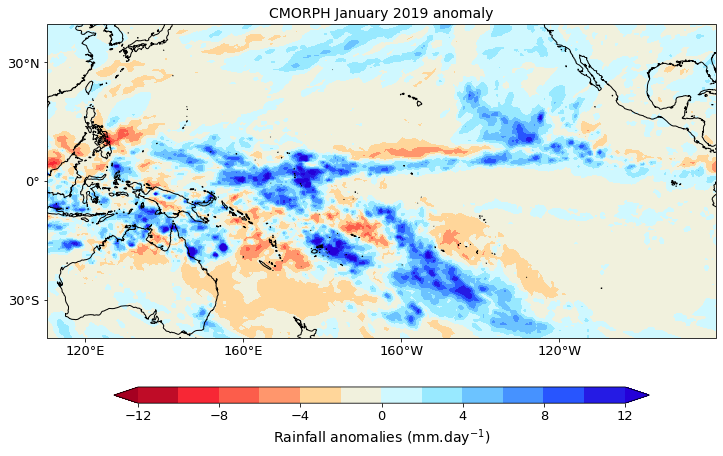

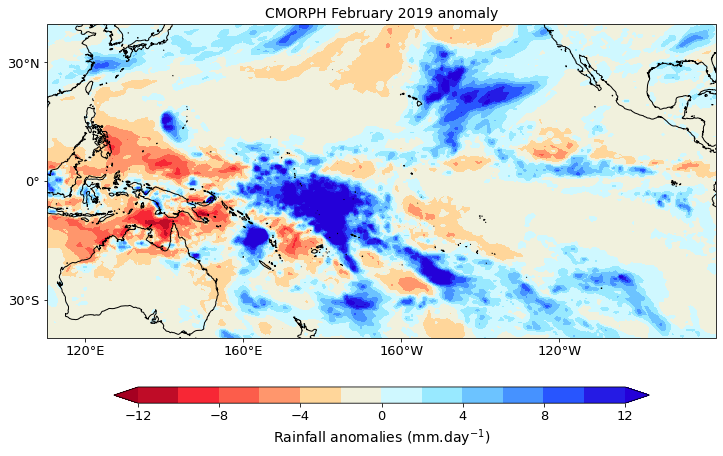

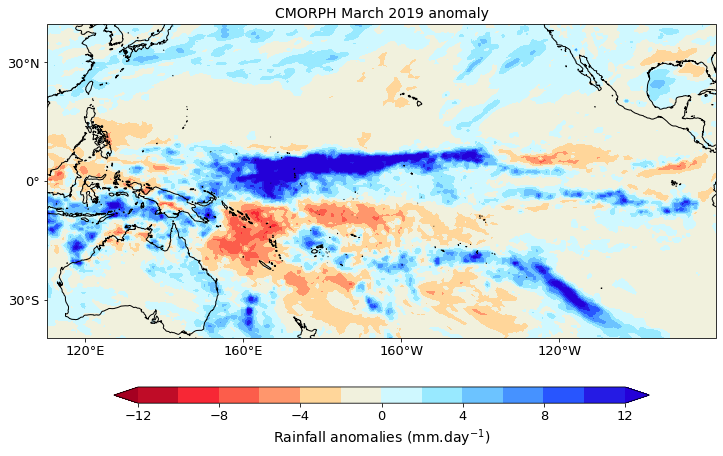

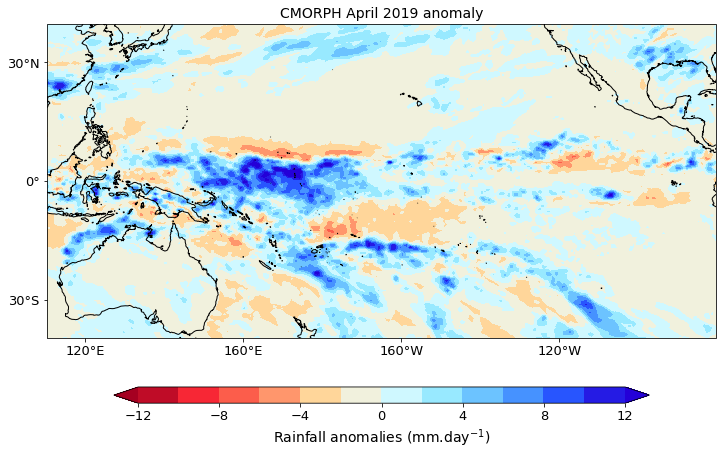

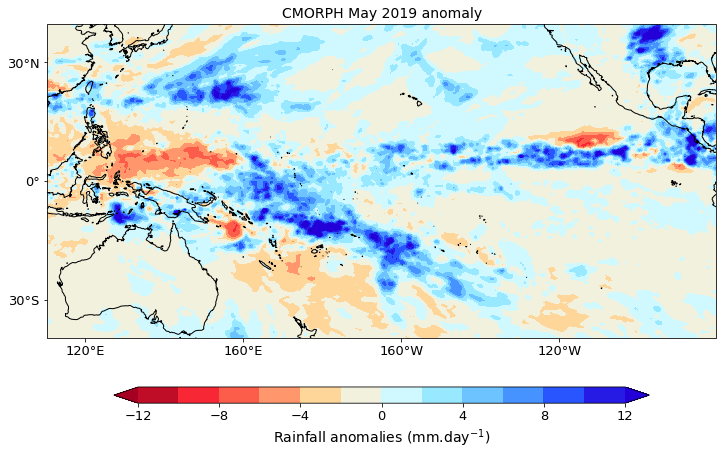

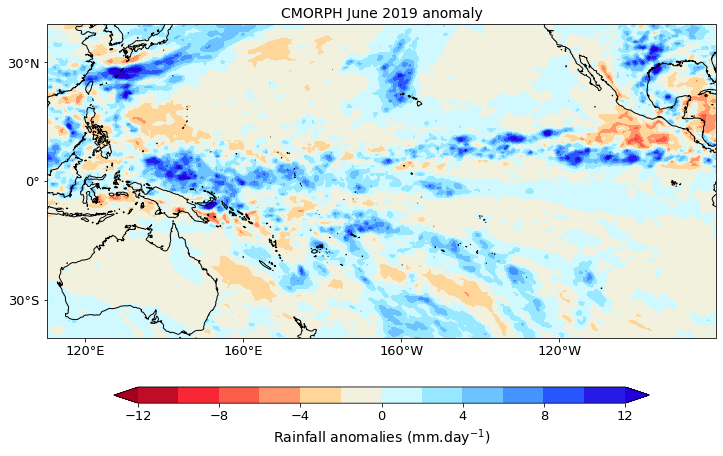

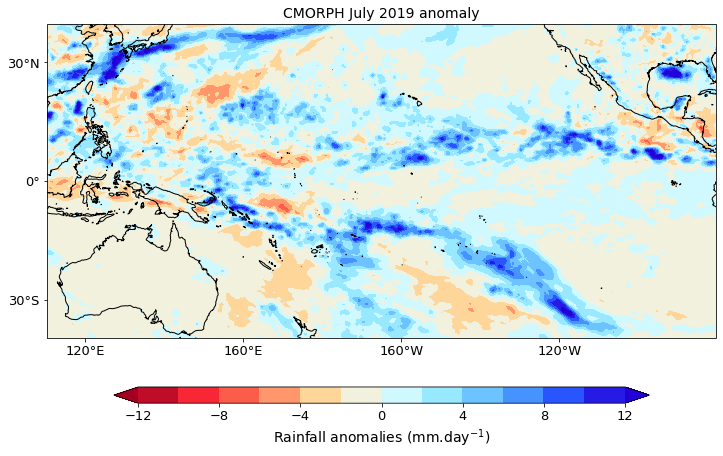

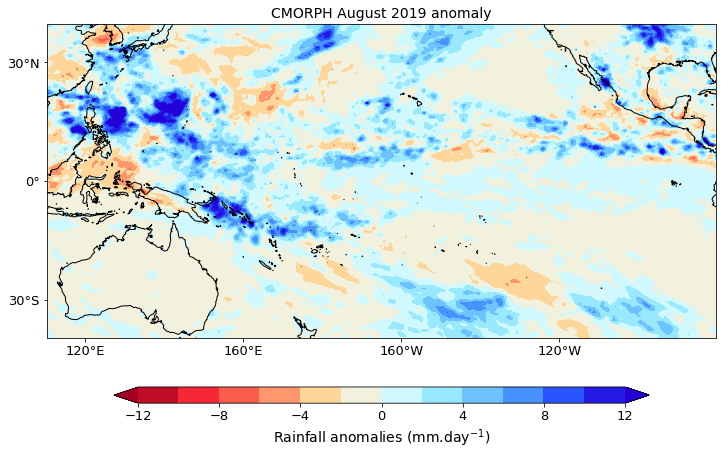

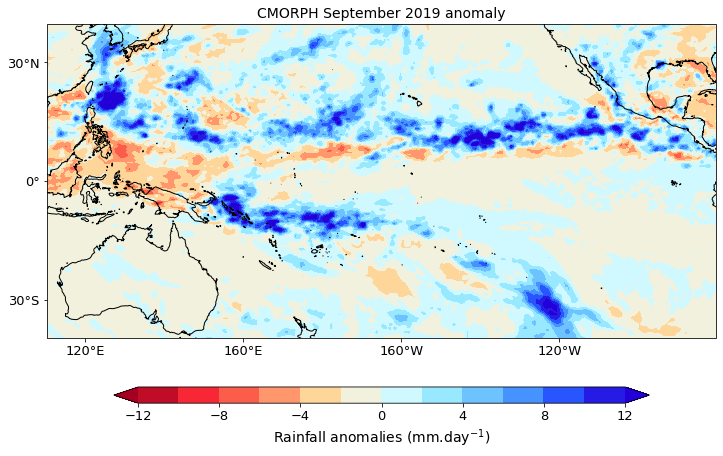

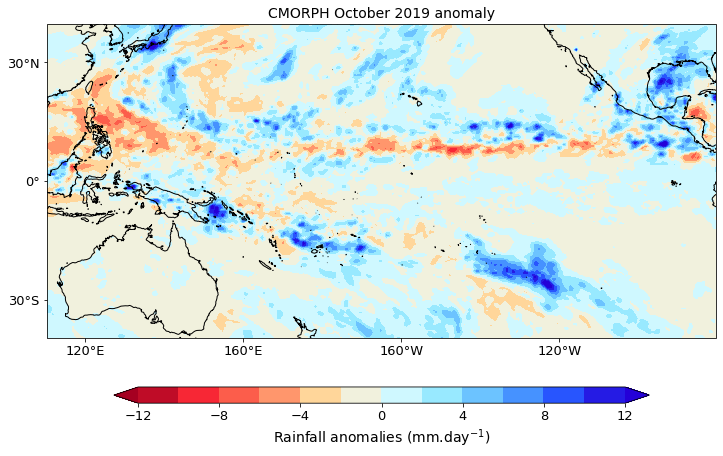

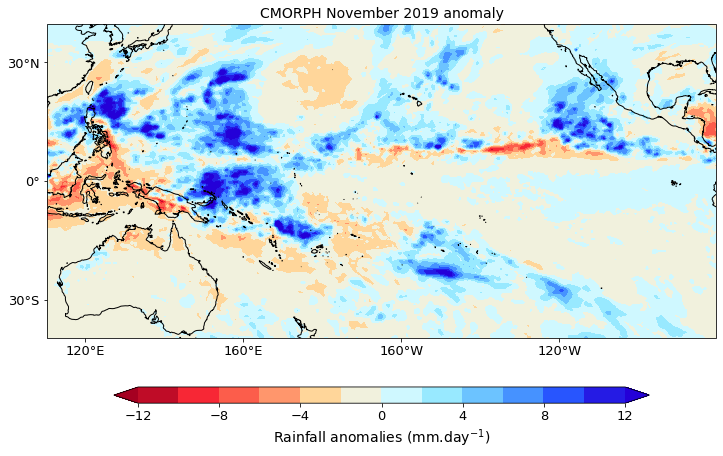

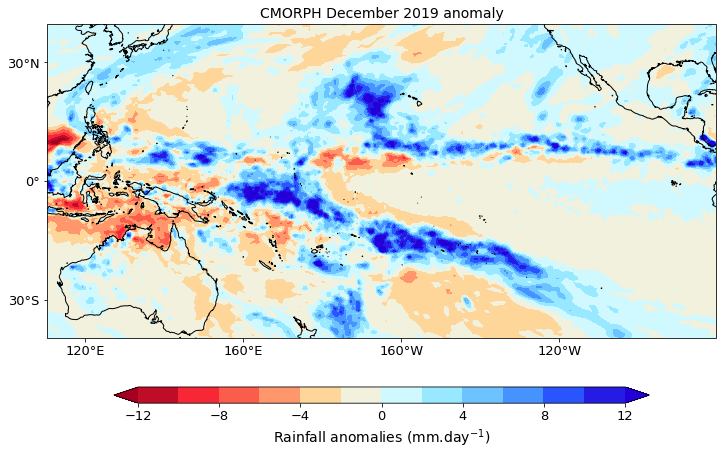

In [34]:
for date in pd.date_range(start='2019-01-01', end='2019-12-01', freq='MS'): 
    title = f"CMORPH {date:%B %Y} anomaly"
    fname = f"../figures/CMORPH_anomaly_mm_{date:%Y-%m}.png" 
    plot_map(anoms, date, varname=varname, title=title, fname=fname, units=units, cmap=cmap, vmin=vmin, vmax=vmax, step=step)

### anomalies in percentage of normal 

In [35]:
anoms_pp = (dset.groupby(dset.time.dt.month) / clim) * 100

In [50]:
vmin = 0
vmax = 400 
step = 10

### set the mid point for the diverging colormap at 100 % 

In [51]:
mid_point = 100

In [52]:
norm = colors.DivergingNorm(vmin=vmin, vcenter=mid_point, vmax=vmax)

/home/nicolasf/anaconda3/envs/climlab/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: 
The DivergingNorm class was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use TwoSlopeNorm instead.
  """Entry point for launching an IPython kernel.


In [53]:
units = "Rainfall anomalies (% Normal)"

In [54]:
cmap = palettable.lightbartlein.diverging.BlueDarkRed18_9_r

In [55]:
cmap = cmap.mpl_colormap

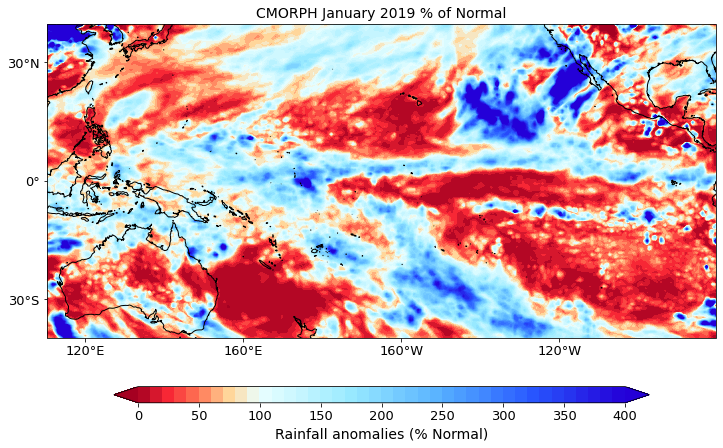

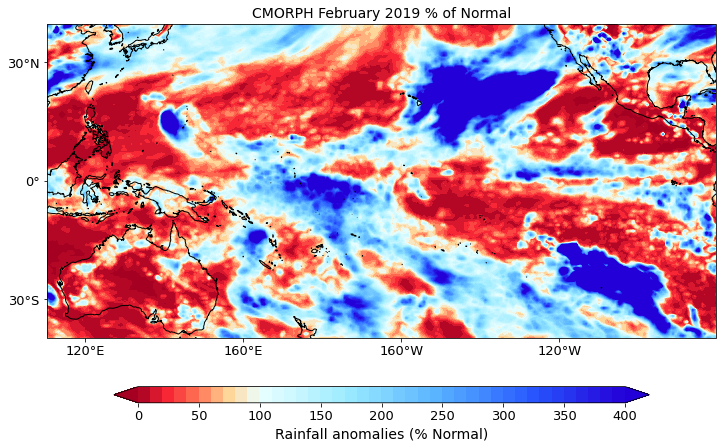

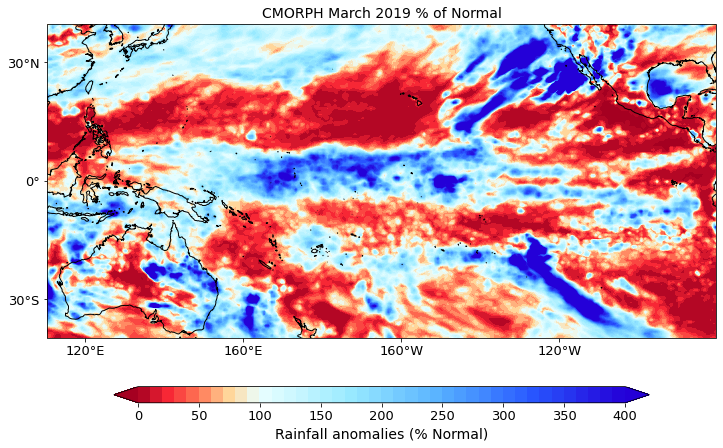

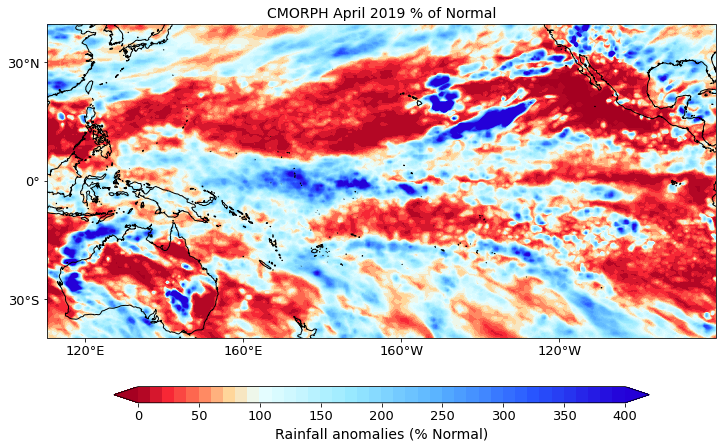

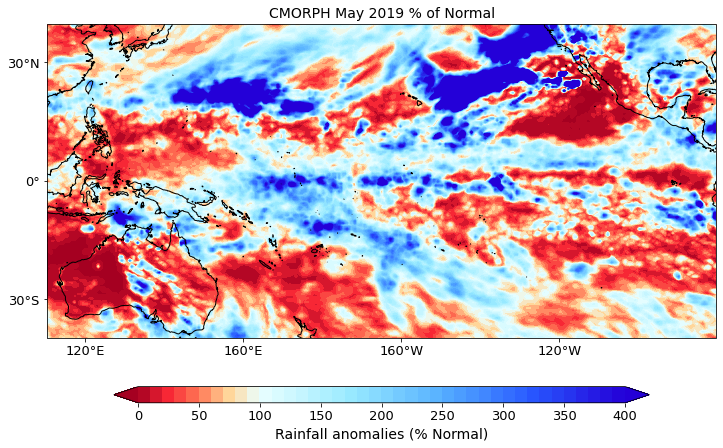

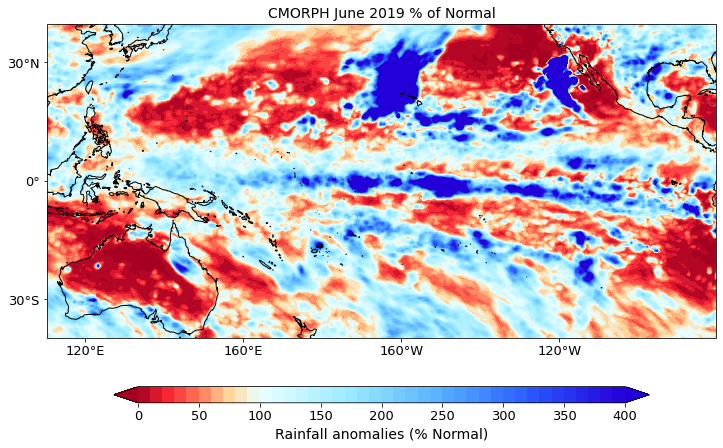

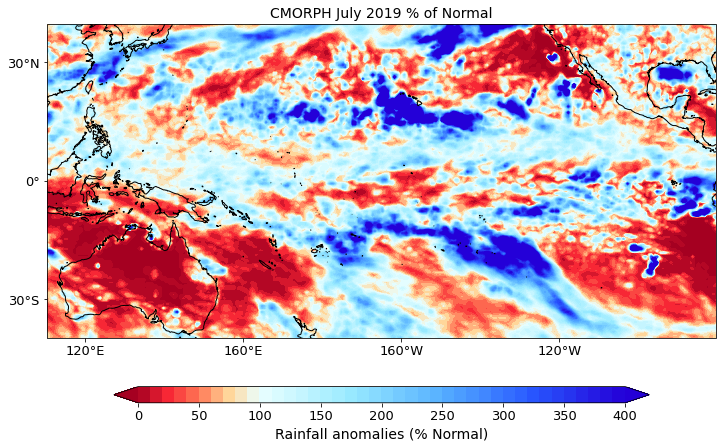

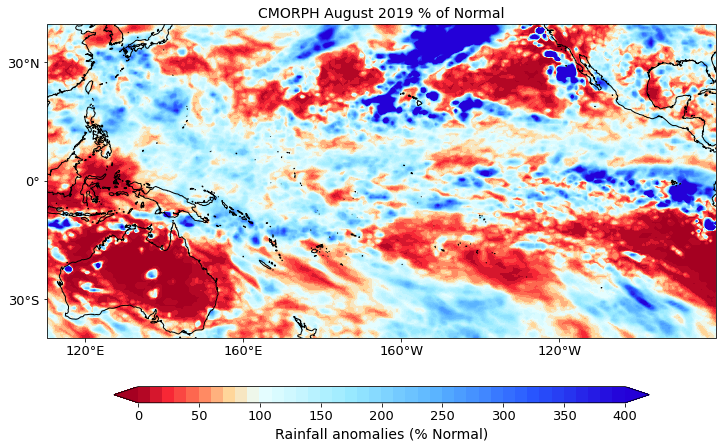

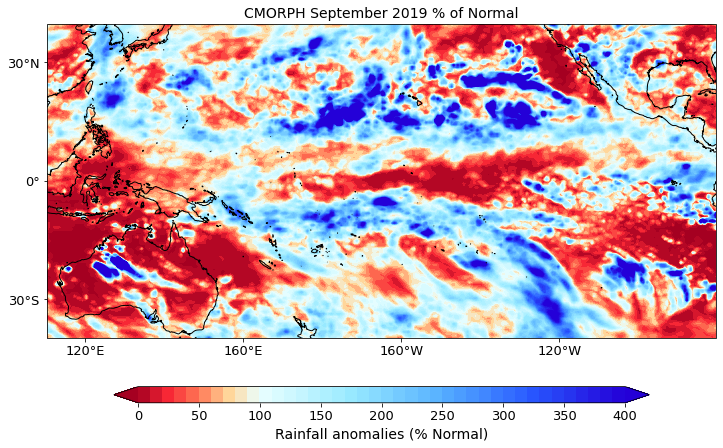

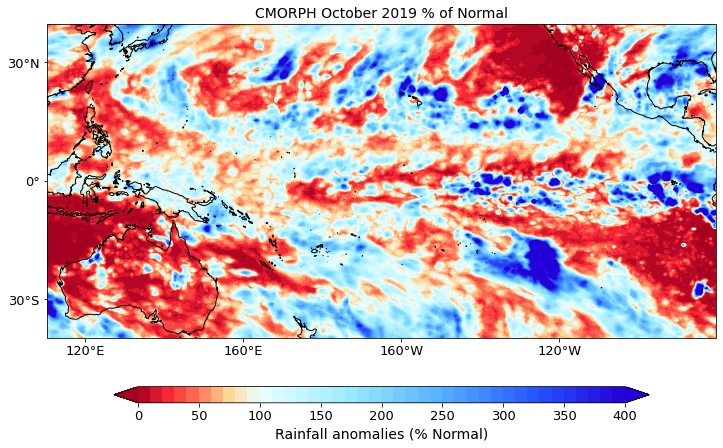

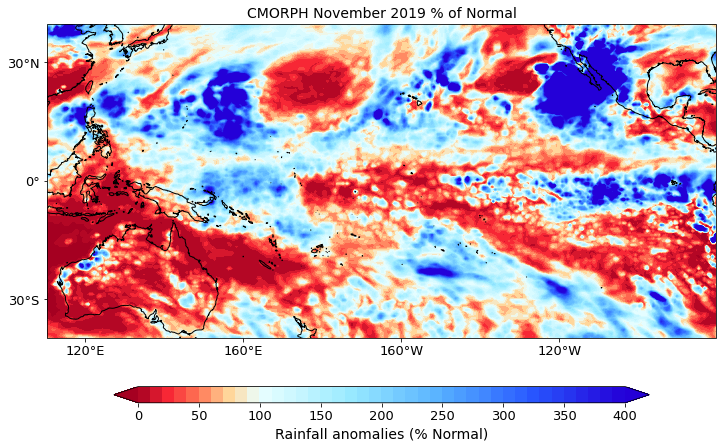

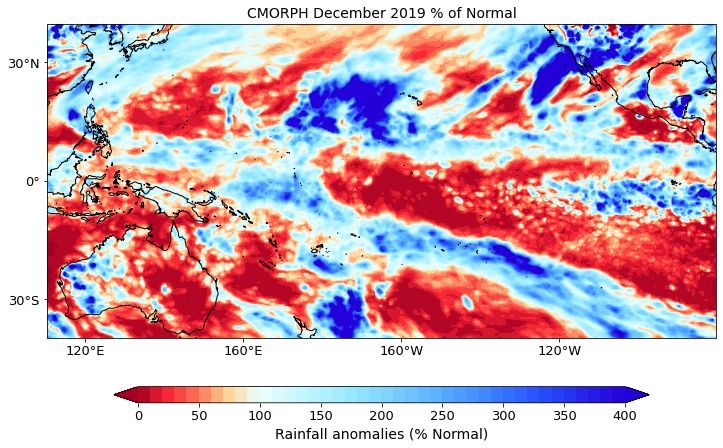

In [56]:
for date in pd.date_range(start='2019-01-01', end='2019-12-01', freq='MS'): 
    title = f"CMORPH {date:%B %Y} % of Normal"
    fname = f"../figures/CMORPH_anomaly_percent_{date:%Y-%m}.png"
    plot_map(anoms_pp, date, varname=varname, title=title, fname=fname, units=units, cmap=cmap, norm=norm, vmin=vmin, vmax=vmax, step=step)

### Now just plots the monthly average value 

In [57]:
varname = 'prcp'

In [58]:
vmin = 0
vmax = 20 
step = 1

In [59]:
units="Rainfall (mm.day$^{-1}$)"

In [60]:
cmap = palettable.lightbartlein.sequential.Blues7_7

In [61]:
cmap = cmap.mpl_colormap

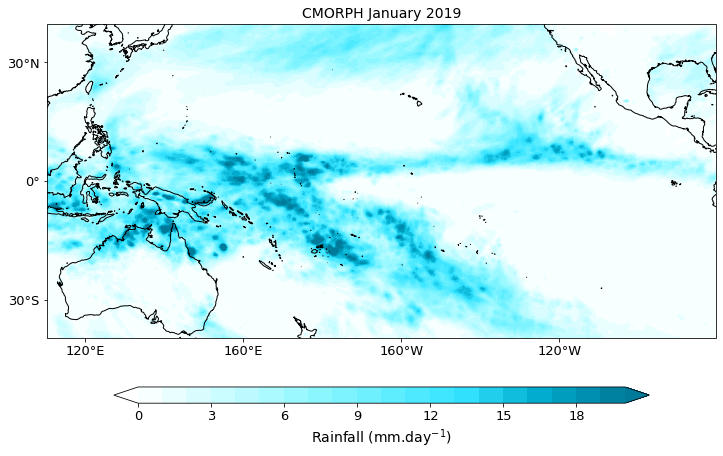

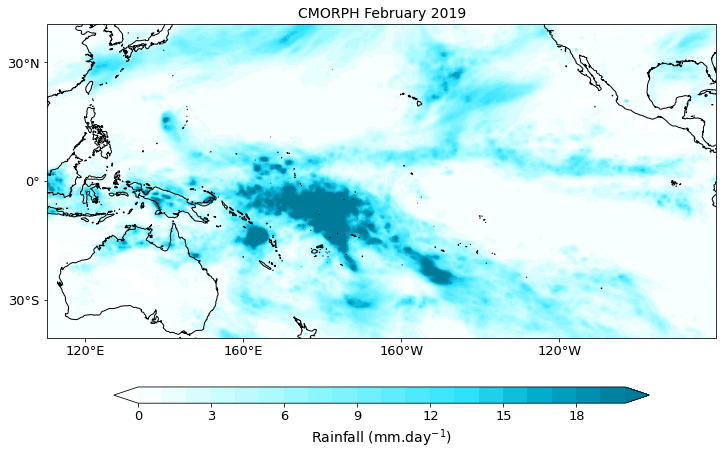

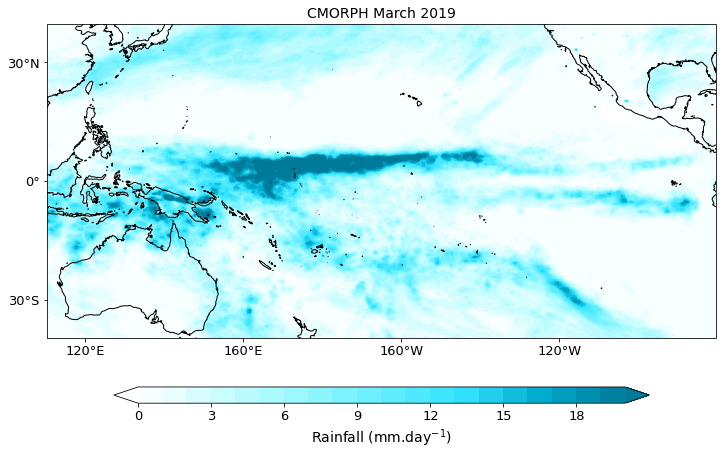

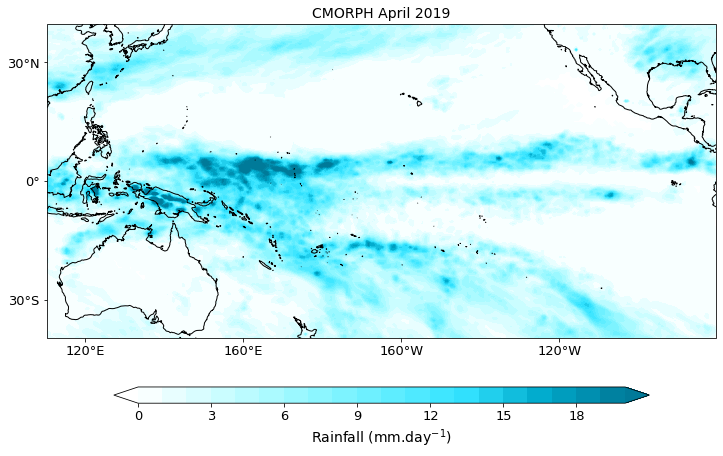

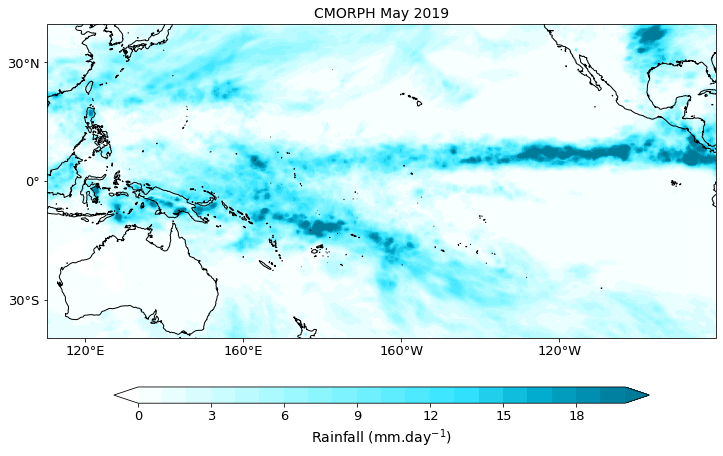

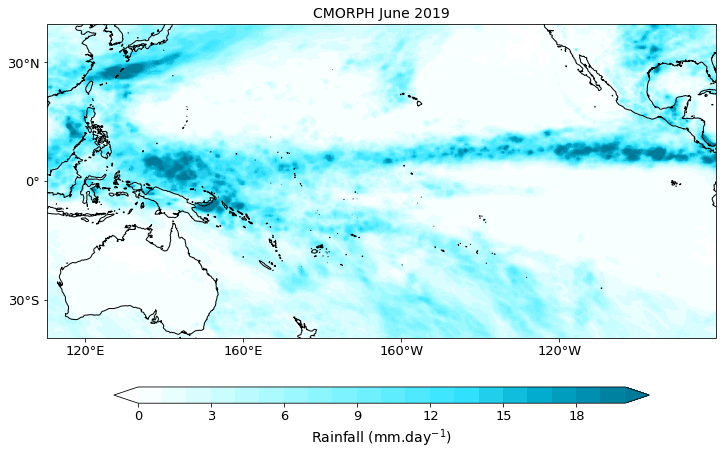

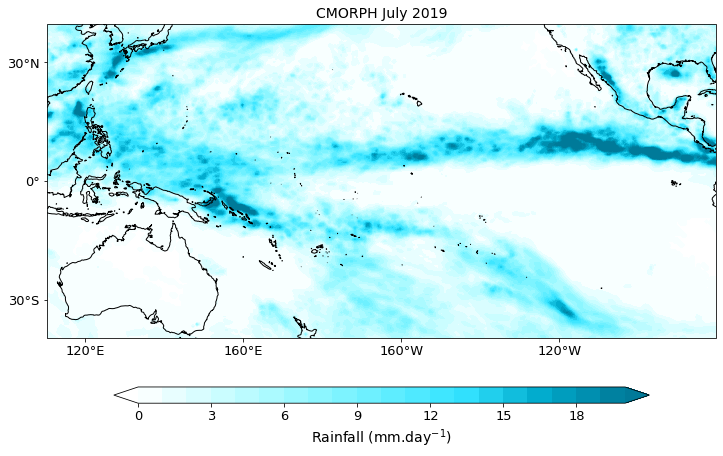

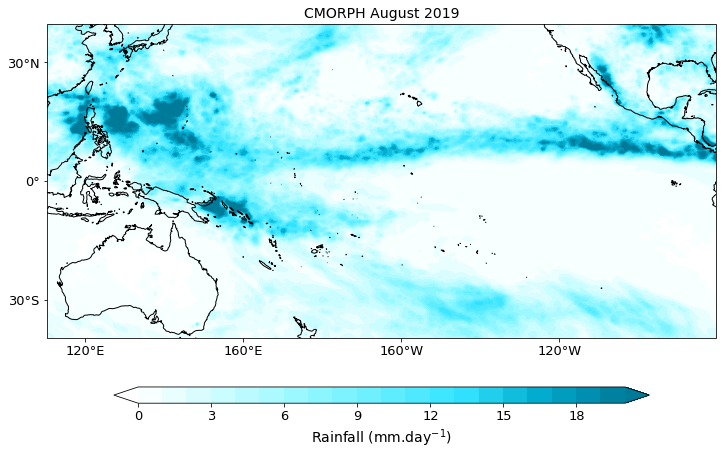

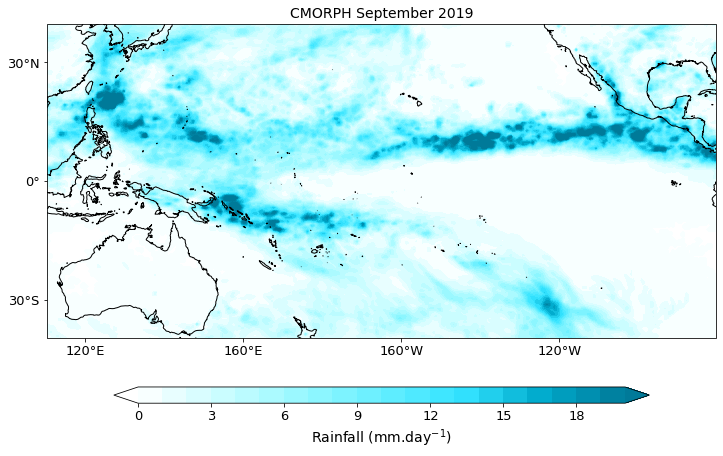

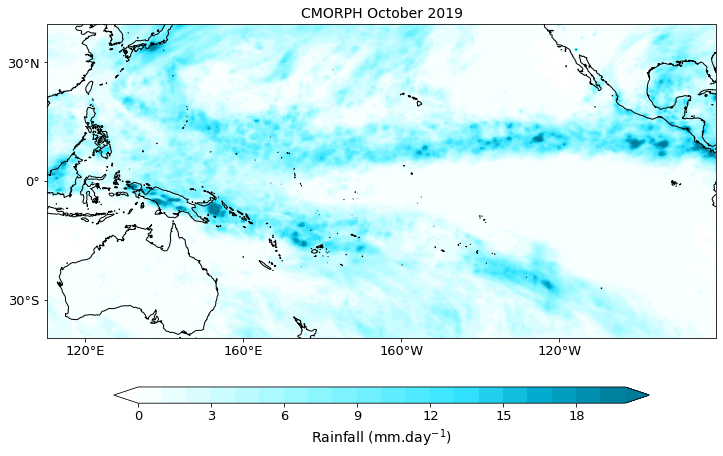

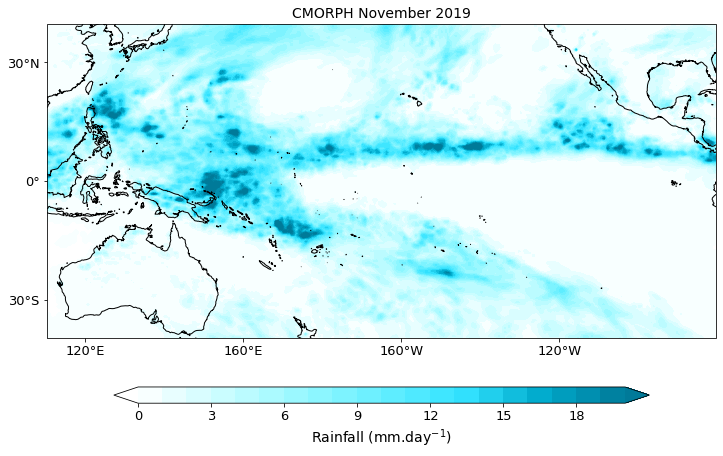

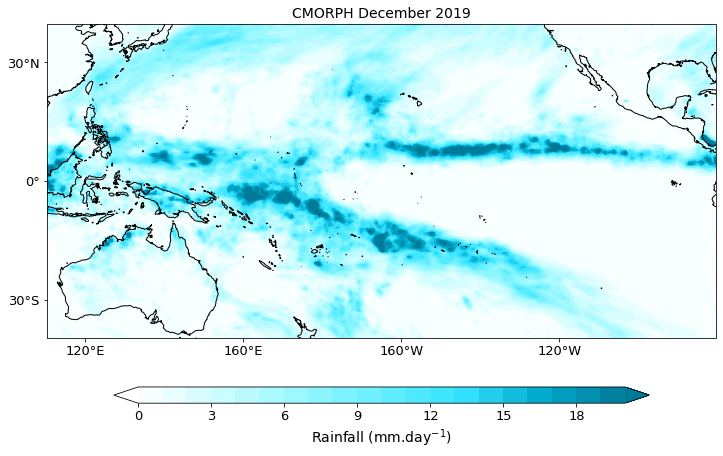

In [62]:
for date in pd.date_range(start='2019-01-01', end='2019-12-01', freq='MS'): 
    title = f"CMORPH {date:%B %Y}"
    fname = f"../figures/CMORPH_average_mm_{date:%Y-%m}.png"
    plot_map(dset, date, varname=varname, title=title, fname=fname, units=units, cmap=cmap, vmin=vmin, vmax=vmax, step=step)